# PyTorch's `torch.nn.Sequential`

tags: pytorch, tutorial, sequential

# Imports

In [1]:
from collections import OrderedDict
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
%matplotlib inline

# Compose functions via `nn.Sequential`

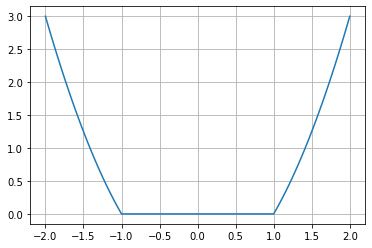

In [2]:
class Bob(nn.Module):
    def forward(self, x):
        return x**2

class Joe(nn.Module):
    def forward(self, x):
        return x - 1
    
model = nn.Sequential(Bob(), Joe())
# model = nn.Sequential(Joe(), Bob(), nn.Sigmoid())
model = nn.Sequential(Bob(), Joe(), nn.ReLU())

x = torch.linspace(-2, 2, 101).view(-1, 1)

with torch.no_grad():
    y = model(x)
    
plt.plot(x, y)
plt.grid();

# Univariate, scalar layer

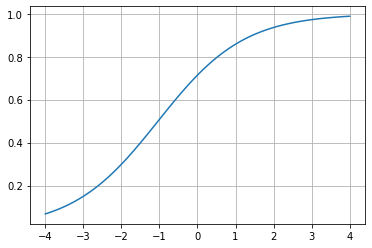

In [3]:
model = nn.Sequential(nn.Linear(1, 1), nn.Sigmoid())

x = torch.linspace(-4, 4, 101).view(-1, 1)

with torch.no_grad():
    y = model(x)
    
plt.plot(x, y)
plt.grid();

Here we insert a linear output layer:

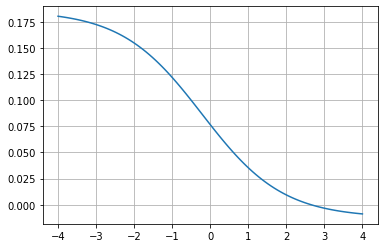

In [4]:
model = nn.Sequential(
    nn.Linear(1, 1), nn.Sigmoid(),
    nn.Linear(1, 1)
)

x = torch.linspace(-4, 4, 101).view(-1, 1)

with torch.no_grad():
    y = model(x)
    
plt.plot(x, y)
plt.grid();

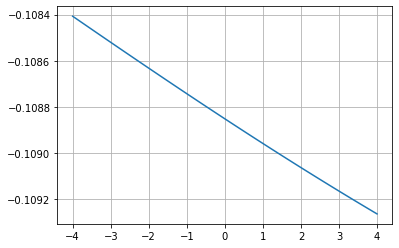

In [5]:
L = 3
list_linears = [nn.Linear(1, 1) for _ in range(L)]
list_sigmoids = [nn.Sigmoid() for _ in range(L)]

model = nn.Sequential(
    *[module for pair in zip(list_linears, list_sigmoids) for module in pair],
    nn.Linear(1, 1)
)

x = torch.linspace(-4, 4, 101).view(-1, 1)

with torch.no_grad():
    y = model(x)
    
plt.plot(x, y)
plt.grid();

# Higher-dimensional hidden layers

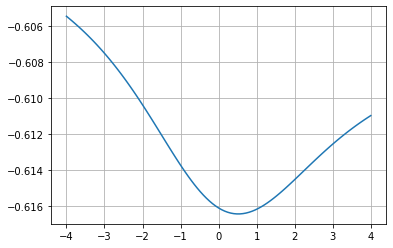

In [6]:
model = nn.Sequential(
    nn.Linear(1, 10), nn.Sigmoid(),
    nn.Linear(10, 10), nn.Sigmoid(),
    nn.Linear(10, 1)
)

x = torch.linspace(-4, 4, 101).view(-1, 1)

with torch.no_grad():
    y = model(x)
    
plt.plot(x, y)
plt.grid();

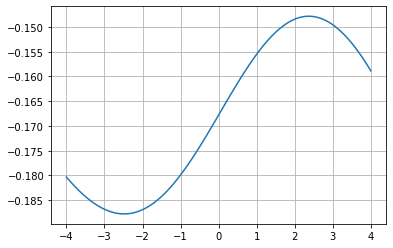

In [7]:
H = 1 # nb of hidden layers
W = 10 # width=dimension of hidden layers - all same
list_linears = [nn.Linear(W, W) for _ in range(H)]
list_sigmoids = [nn.Sigmoid() for _ in range(H)]

model = nn.Sequential(
    nn.Linear(1, W),
    *[module for pair in zip(list_linears, list_sigmoids) for module in pair],
    nn.Linear(W, 1)
)

x = torch.linspace(-4, 4, 101).view(-1, 1)

with torch.no_grad():
    y = model(x)
    
plt.plot(x, y)
plt.grid();

# Nets with large number of layers

# Initial output is constant
The output is, for each value of `x`, a weighted average of the parameters in the `model`.  
As the number of layers increases, the output is closer and closer to a constant.  

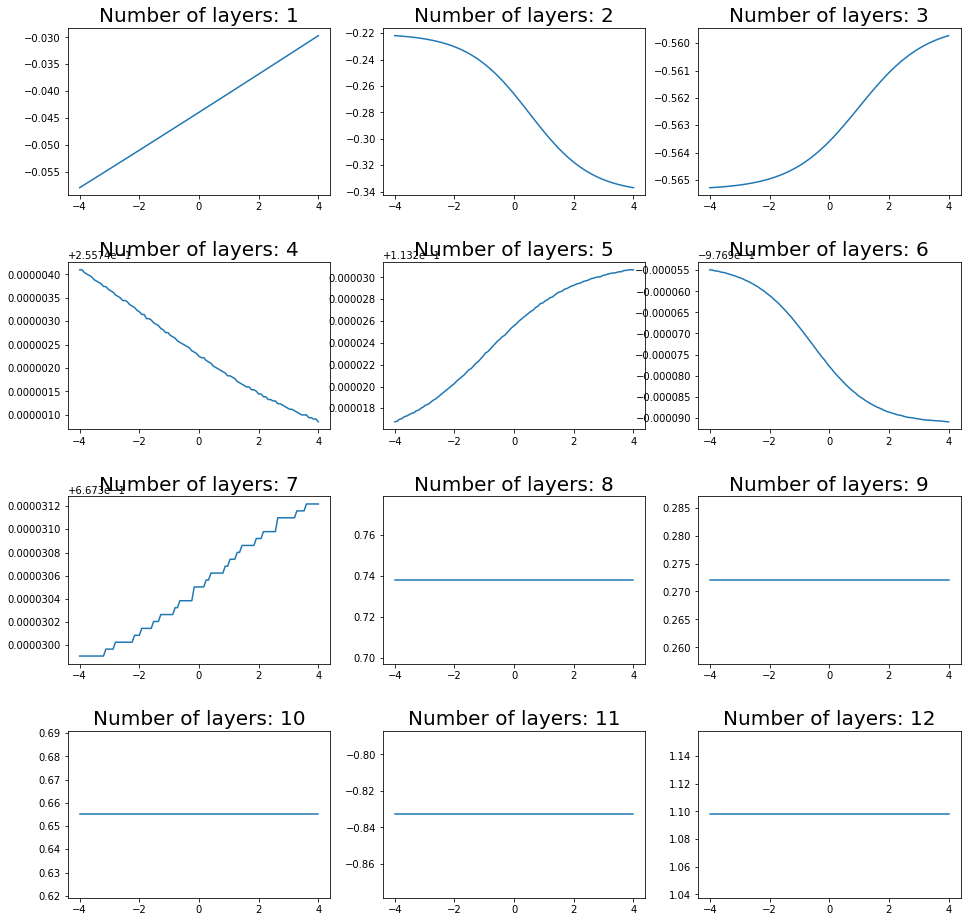

In [8]:
x = torch.linspace(-4, 4, 101).view(-1, 1)

L_range = range(1, 13)
n_cols = 3
n_rows = len(L_range)//n_cols + int(len(L_range)%n_cols >0)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
plt.subplots_adjust(hspace=.4)

axs = axs.flatten()

for i, L in enumerate(L_range):
    list_linears = [nn.Linear(1, 1) for _ in range(L)]
    list_sigmoids = [nn.Sigmoid() for _ in range(L)]
    model = nn.Sequential(
        *[module for pair in zip(list_linears, list_sigmoids) for module in pair],
        nn.Linear(1, 1)
    )

    with torch.no_grad():
        y = model(x)

    ax = axs[i]
    ax.plot(x, y)
    ax.set_title(f"Number of layers: {L}", fontsize=20);
    